## 1

In [193]:
import csv
import random

with open('2.csv', 'w', newline='', encoding='utf-8') as csvfile:
    fieldnames = ['学号', '姓名', '性别', '年龄' , '语文', '数学']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for i in range(20):
        writer.writerow({'学号': random.randint(0,100), '姓名': i, '性别': random.sample(['男', '女'], 1)[0], '年龄':random.randint(18,20), '语文':random.randint(0,100), '数学': random.randint(0,100)})

In [194]:
import csv
with open('2.csv', newline='', encoding='utf-8') as csvfile:
    reader = csv.DictReader(csvfile)
    sortdata = sorted(reader, key=lambda x:int(x['数学']))

with open('sort.csv', 'w', newline='', encoding='utf-8') as csvfile:
    fieldnames = ['学号', '姓名', '性别', '年龄' , '语文', '数学']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    for data in sortdata:
        writer.writerow(data)

## 2

In [195]:
import os

In [197]:
with open("1.txt", 'w') as file:
    for root, dirs, files in os.walk(".", topdown=True):
        for name in files:
            if os.path.splitext(name)[1] in [".png",".bmp",".jpg",".jpeg"]:
                file.write(os.path.abspath(name)+'\n')

## 3

In [198]:
def polyarea(x,y):
    A = 0
    n = len(x)
    for i in range(n):
        A += x[i] * y[(i + 1) % n]
        A -= y[i] * x[(i + 1) % n]
    return abs(A)/2

In [199]:
print(polyarea([1,3,2],[1,1,3]))

2.0


## 4

In [200]:
import math

In [201]:
print(math.pi)

3.141592653589793


In [202]:
def cal_pi(N):
    pi_1 = [8/3]
    pi_2 = [0]
    for i in range(1,N+1):
        pi_1.append(pi_1[i-1]+8/((4*i+1)*(4*i+3)))
        pi_2.append(pi_2[i-1]+6/(i**2))
    pi_2 = [math.sqrt(number) for number in pi_2]
    loss_pi_1 = [abs(number - math.pi) for number in pi_1]
    loss_pi_2 = [abs(number - math.pi) for number in pi_2]
    return loss_pi_1,loss_pi_2

In [206]:
loss_pi_1,loss_pi_2 = cal_pi(50)

In [207]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

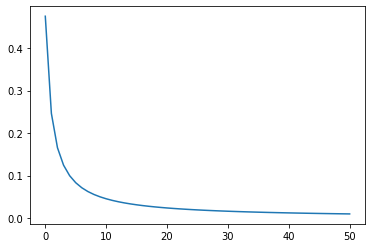

In [208]:
plt.plot(loss_pi_1)

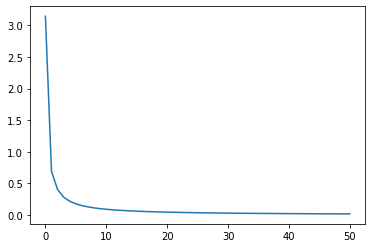

In [209]:
plt.plot(loss_pi_2)

## 5

In [210]:
import cv2
import os
import shutil
print(cv2.__version__)

4.1.0


In [211]:
if not os.path.exists("./pictures/cat"):
    os.makedirs("./pictures/cat")
if not os.path.exists("./pictures/person"):
    os.makedirs("./pictures/person")

In [17]:
for root, dirs, files in os.walk("./pictures", topdown=True):
        for name in files:
            ImagePath = os.path.join(root, name)
            image = cv2.imread(ImagePath)
#             print(image)
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

            face_cascade = cv2.CascadeClassifier(r'./haarcascade_frontalcatface.xml')
            faces = face_cascade.detectMultiScale(gray,scaleFactor=1.15,minNeighbors=5,minSize=(3, 3))
            
            if(len(faces)):
                shutil.move(os.path.join(root, name),"./pictures/cat/")

Error: Destination path './pictures/cat/216c04d100185cf6d5e99f75af1b972a.jpeg' already exists

## 6

In [214]:
import PIL
import os
import numpy
from PIL import Image

In [243]:
cats = []
for root, dirs, files in os.walk("./pictures/cat", topdown=True):
        for name in files:
            ImagePath = os.path.join(root, name)
            im = Image.open(ImagePath)
            im = im.resize((100,100))
            im = np.asarray(im)
            cats.append(im)

In [244]:
a = np.concatenate((cats[0:4]),axis=0)
b = np.concatenate((cats[4:8]),axis=0)
c = np.concatenate((cats[8:12]),axis=0)
d = np.concatenate((cats[12:16]),axis=0)

cat_img = np.concatenate([a,b,c,d],axis=1)

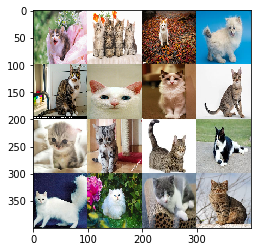

In [245]:
plt.imshow(cat_img)

In [246]:
persons = []
for root, dirs, files in os.walk("./pictures/person", topdown=True):
        for name in files:
            ImagePath = os.path.join(root, name)
            im = Image.open(ImagePath)
            im = im.resize((100,100))
            im = np.asarray(im)
            persons.append(im)

In [247]:
a = np.concatenate((persons[0:4]),axis=0)
b = np.concatenate((persons[4:8]),axis=0)
c = np.concatenate((persons[8:12]),axis=0)
d = np.concatenate((persons[12:16]),axis=0)

person_img = np.concatenate([a,b,c,d],axis=1)
person_img.shape

(400, 400, 3)

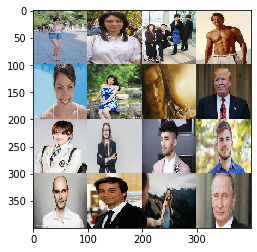

In [248]:
plt.imshow(person_img)